In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import jieba as jb
import re

In [4]:
df = pd.read_csv('./data/shopping.csv')
df=df[['cat','review']]
print("数据总量: %d ." % len(df))
df.sample(10)

数据总量: 62774 .


,cat,review
40607,衣服,裤子质量不错， 版型很漂亮！ 老公穿上帅帅哒 ！
24558,水果,刚收到货发现苹果有几个是烂的，其他的放7天都烂了。坑死人的京东
6845,平板,挺不错的，好评
58788,酒店,"房间比较大,但是设备显陈旧,最不喜欢是蹲厕,另外每层楼都是出租的办公室和酒店客房一起"
12142,平板,第一次上京东，点子不准中午9:45到货，下午3:40分退货，充两小时电开不了机！
44703,衣服,买了没几天就减价了，差评，联系客服态度恶劣，还不退差价
37378,蒙牛,见面会马上开始，我没伞下着雨过来了买了喝了蒙牛，吃了好吃的糯米卷，看着很像馒头，哈哈，赶紧结...
35053,洗发水,一个订单分了5个包裹还不是同一天送来！就是看到送电吹风才买的！电吹风呢？？？电吹风呢？？？电...
12040,平板,质量很差，己返修过，所有键反应迟钝不如小米！
31393,洗发水,恶心，假的，用了之后发现很多头皮屑，之前我是一点都没有的。一个星的不想给


In [5]:
print("在 cat 列中总共有 %d 个空值." % df['cat'].isnull().sum())
print("在 review 列中总共有 %d 个空值." % df['review'].isnull().sum())
df[df.isnull().values==True]
df = df[pd.notnull(df['review'])]

在 cat 列中总共有 0 个空值.
在 review 列中总共有 1 个空值.


In [6]:
d = {'cat':df['cat'].value_counts().index, 'count': df['cat'].value_counts()}
df_cat = pd.DataFrame(data=d).reset_index(drop=True)
df_cat

,cat,count
0,水果,10000
1,平板,10000
2,洗发水,10000
3,衣服,10000
4,酒店,10000
5,计算机,3992
6,书籍,3851
7,手机,2323
8,蒙牛,2033
9,热水器,574


Text(0.5,0,'类目')

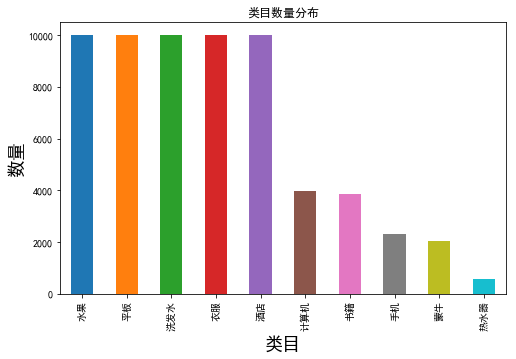

In [7]:
df_cat.plot(x='cat', y='count', kind='bar', legend=False,  figsize=(8, 5))
plt.title("类目数量分布")
plt.ylabel('数量', fontsize=18)
plt.xlabel('类目', fontsize=18)

In [8]:
# fig = plt.figure(figsize=(8,6))
# df.groupby('cat').review.count().plot.bar(ylim=0)
# plt.title("类目数量分布")
# plt.ylabel('数量', fontsize=18)
# plt.xlabel('类目', fontsize=18)
# plt.show()

In [9]:
df['cat_id'] = df['cat'].factorize()[0]
cat_id_df = df[['cat', 'cat_id']].drop_duplicates().sort_values('cat_id').reset_index(drop=True)
cat_to_id = dict(cat_id_df.values)
id_to_cat = dict(cat_id_df[['cat_id', 'cat']].values)
df.sample(10)

,cat,review,cat_id
19743,水果,还没吃，重量2公斤多，但品质不太好！,3
16122,手机,打2小时就关机拉,2
312,书籍,这本书是帮我的同事买的，到书的时候，我也翻了一下。书的画面色彩鲜艳，而且很详细的画出了某些细...,0
54769,酒店,"硬件基本什么都不缺, 但又总觉得缺点什么!",9
17825,水果,苹果大小适宜，没有坏的，味道脆而甜。价格比较实惠，一下买了两箱，吃完了还会再来买！,3
3333,书籍,"觉得不太好,搞不懂为什么那么畅销.",0
34877,洗发水,赠送品发错了，希望没有下次了。,4
1886,书籍,办公室的一位同事翻看了这套书，按捺不住心中的共鸣，不听劝非要买了一套，自己津津有味地读起来，...,0
9965,平板,手机真是烂，卡的一匹,1
33291,洗发水,这洗发水跟超市买的差太远了！！！！！,4


In [10]:
cat_id_df

,cat,cat_id
0,书籍,0
1,平板,1
2,手机,2
3,水果,3
4,洗发水,4
5,热水器,5
6,蒙牛,6
7,衣服,7
8,计算机,8
9,酒店,9


In [11]:
#定义删除除字母,数字，汉字以外的所有符号的函数
def remove_punctuation(line):
    line = str(line)
    if line.strip()=='':
        return ''
    rule = re.compile(u"[^a-zA-Z0-9\u4E00-\u9FA5]")
    line = rule.sub('',line)
    return line

#停用词列表
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
    return stopwords  

#加载停用词
stopwords = stopwordslist("./data/chineseStopWords.txt")


In [12]:
#删除除字母,数字，汉字以外的所有符号
df['clean_review'] = df['review'].apply(remove_punctuation)
df.sample(10)

,cat,review,cat_id,clean_review
62594,酒店,很一般。性价比很差。跟上海的快捷酒店相比，价格贵，服务差；外面空气不错。但是内部装修亟待改善...,9,很一般性价比很差跟上海的快捷酒店相比价格贵服务差外面空气不错但是内部装修亟待改善窗户的高度太...
35005,洗发水,垃圾，还这么贵。真不知道好评哪来的。洗过头发后油的不得了，味道又重的要死，以前用的其他牌子的...,4,垃圾还这么贵真不知道好评哪来的洗过头发后油的不得了味道又重的要死以前用的其他牌子的洗发水三天...
7748,平板,不错 性能比较强,1,不错性能比较强
31770,洗发水,打开之后 发现露了很多洗发液 →_→就不能包装的好点 加些泡沫什么的么!,4,打开之后发现露了很多洗发液就不能包装的好点加些泡沫什么的么
39180,衣服,花花公子旗舰店 值得信赖。要是不掉色就更好了,7,花花公子旗舰店值得信赖要是不掉色就更好了
17170,水果,第一次在京东买水果！保鲜方式挺好的，水果也不错，只是没有想象中的大。,3,第一次在京东买水果保鲜方式挺好的水果也不错只是没有想象中的大
34135,洗发水,绝对是假货！！！！洗了头发好油，还一直掉头发！京东，你真是坑die！！！！,4,绝对是假货洗了头发好油还一直掉头发京东你真是坑die
52052,计算机,XP超难装。无奈在网上找个专业的上门40元搞定。试了几天非常满意，宣传一下：小庄132618...,8,XP超难装无奈在网上找个专业的上门40元搞定试了几天非常满意宣传一下小庄13261821032
5763,平板,平板正在升级中，很漂亮，具体情况还在熟悉，以后追评。,1,平板正在升级中很漂亮具体情况还在熟悉以后追评
50114,计算机,优点有：待机时间长、键盘手感不错、无线网卡是802.N速度快、有蓝牙、CPU是N280的，整...,8,优点有待机时间长键盘手感不错无线网卡是802N速度快有蓝牙CPU是N280的整体感觉不错


In [13]:
#分词，并过滤停用词
df['cut_review'] = df['clean_review'].apply(lambda x: " ".join([w for w in list(jb.cut(x)) if w not in stopwords]))
df.head()

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.220 seconds.
Prefix dict has been built succesfully.


,cat,review,cat_id,clean_review,cut_review
0,书籍,﻿做父母一定要有刘墉这样的心态，不断地学习，不断地进步，不断地给自己补充新鲜血液，让自己保持...,0,做父母一定要有刘墉这样的心态不断地学习不断地进步不断地给自己补充新鲜血液让自己保持一颗年轻的...,做 父母 一定 刘墉 心态 不断 学习 不断 进步 不断 补充 新鲜血液 保持 一颗 年轻 ...
1,书籍,作者真有英国人严谨的风格，提出观点、进行论述论证，尽管本人对物理学了解不深，但是仍然能感受到...,0,作者真有英国人严谨的风格提出观点进行论述论证尽管本人对物理学了解不深但是仍然能感受到真理的火...,作者 真有 英国人 严谨 风格 提出 观点 进行 论述 论证 物理学 了解 不深 仍然 感受...
2,书籍,作者长篇大论借用详细报告数据处理工作和计算结果支持其新观点。为什么荷兰曾经县有欧洲最高的生产...,0,作者长篇大论借用详细报告数据处理工作和计算结果支持其新观点为什么荷兰曾经县有欧洲最高的生产率...,作者 长篇大论 借用 详细 报告 数据处理 工作 计算结果 支持 其新 观点 荷兰 曾经 县...
3,书籍,作者在战几时之前用了＂拥抱＂令人叫绝．日本如果没有战败，就有会有美军的占领，没胡官僚主义的延...,0,作者在战几时之前用了拥抱令人叫绝日本如果没有战败就有会有美军的占领没胡官僚主义的延续没有战后...,作者 战 之前 拥抱 令人 叫绝 日本 没有 战败 会 美军 占领 没胡 官僚主义 延续 没...
4,书籍,作者在少年时即喜阅读，能看出他精读了无数经典，因而他有一个庞大的内心世界。他的作品最难能可贵...,0,作者在少年时即喜阅读能看出他精读了无数经典因而他有一个庞大的内心世界他的作品最难能可贵的有两...,作者 少年 时即 喜 阅读 看出 精读 无数 经典 一个 庞大 内心世界 作品 难能可贵 两...


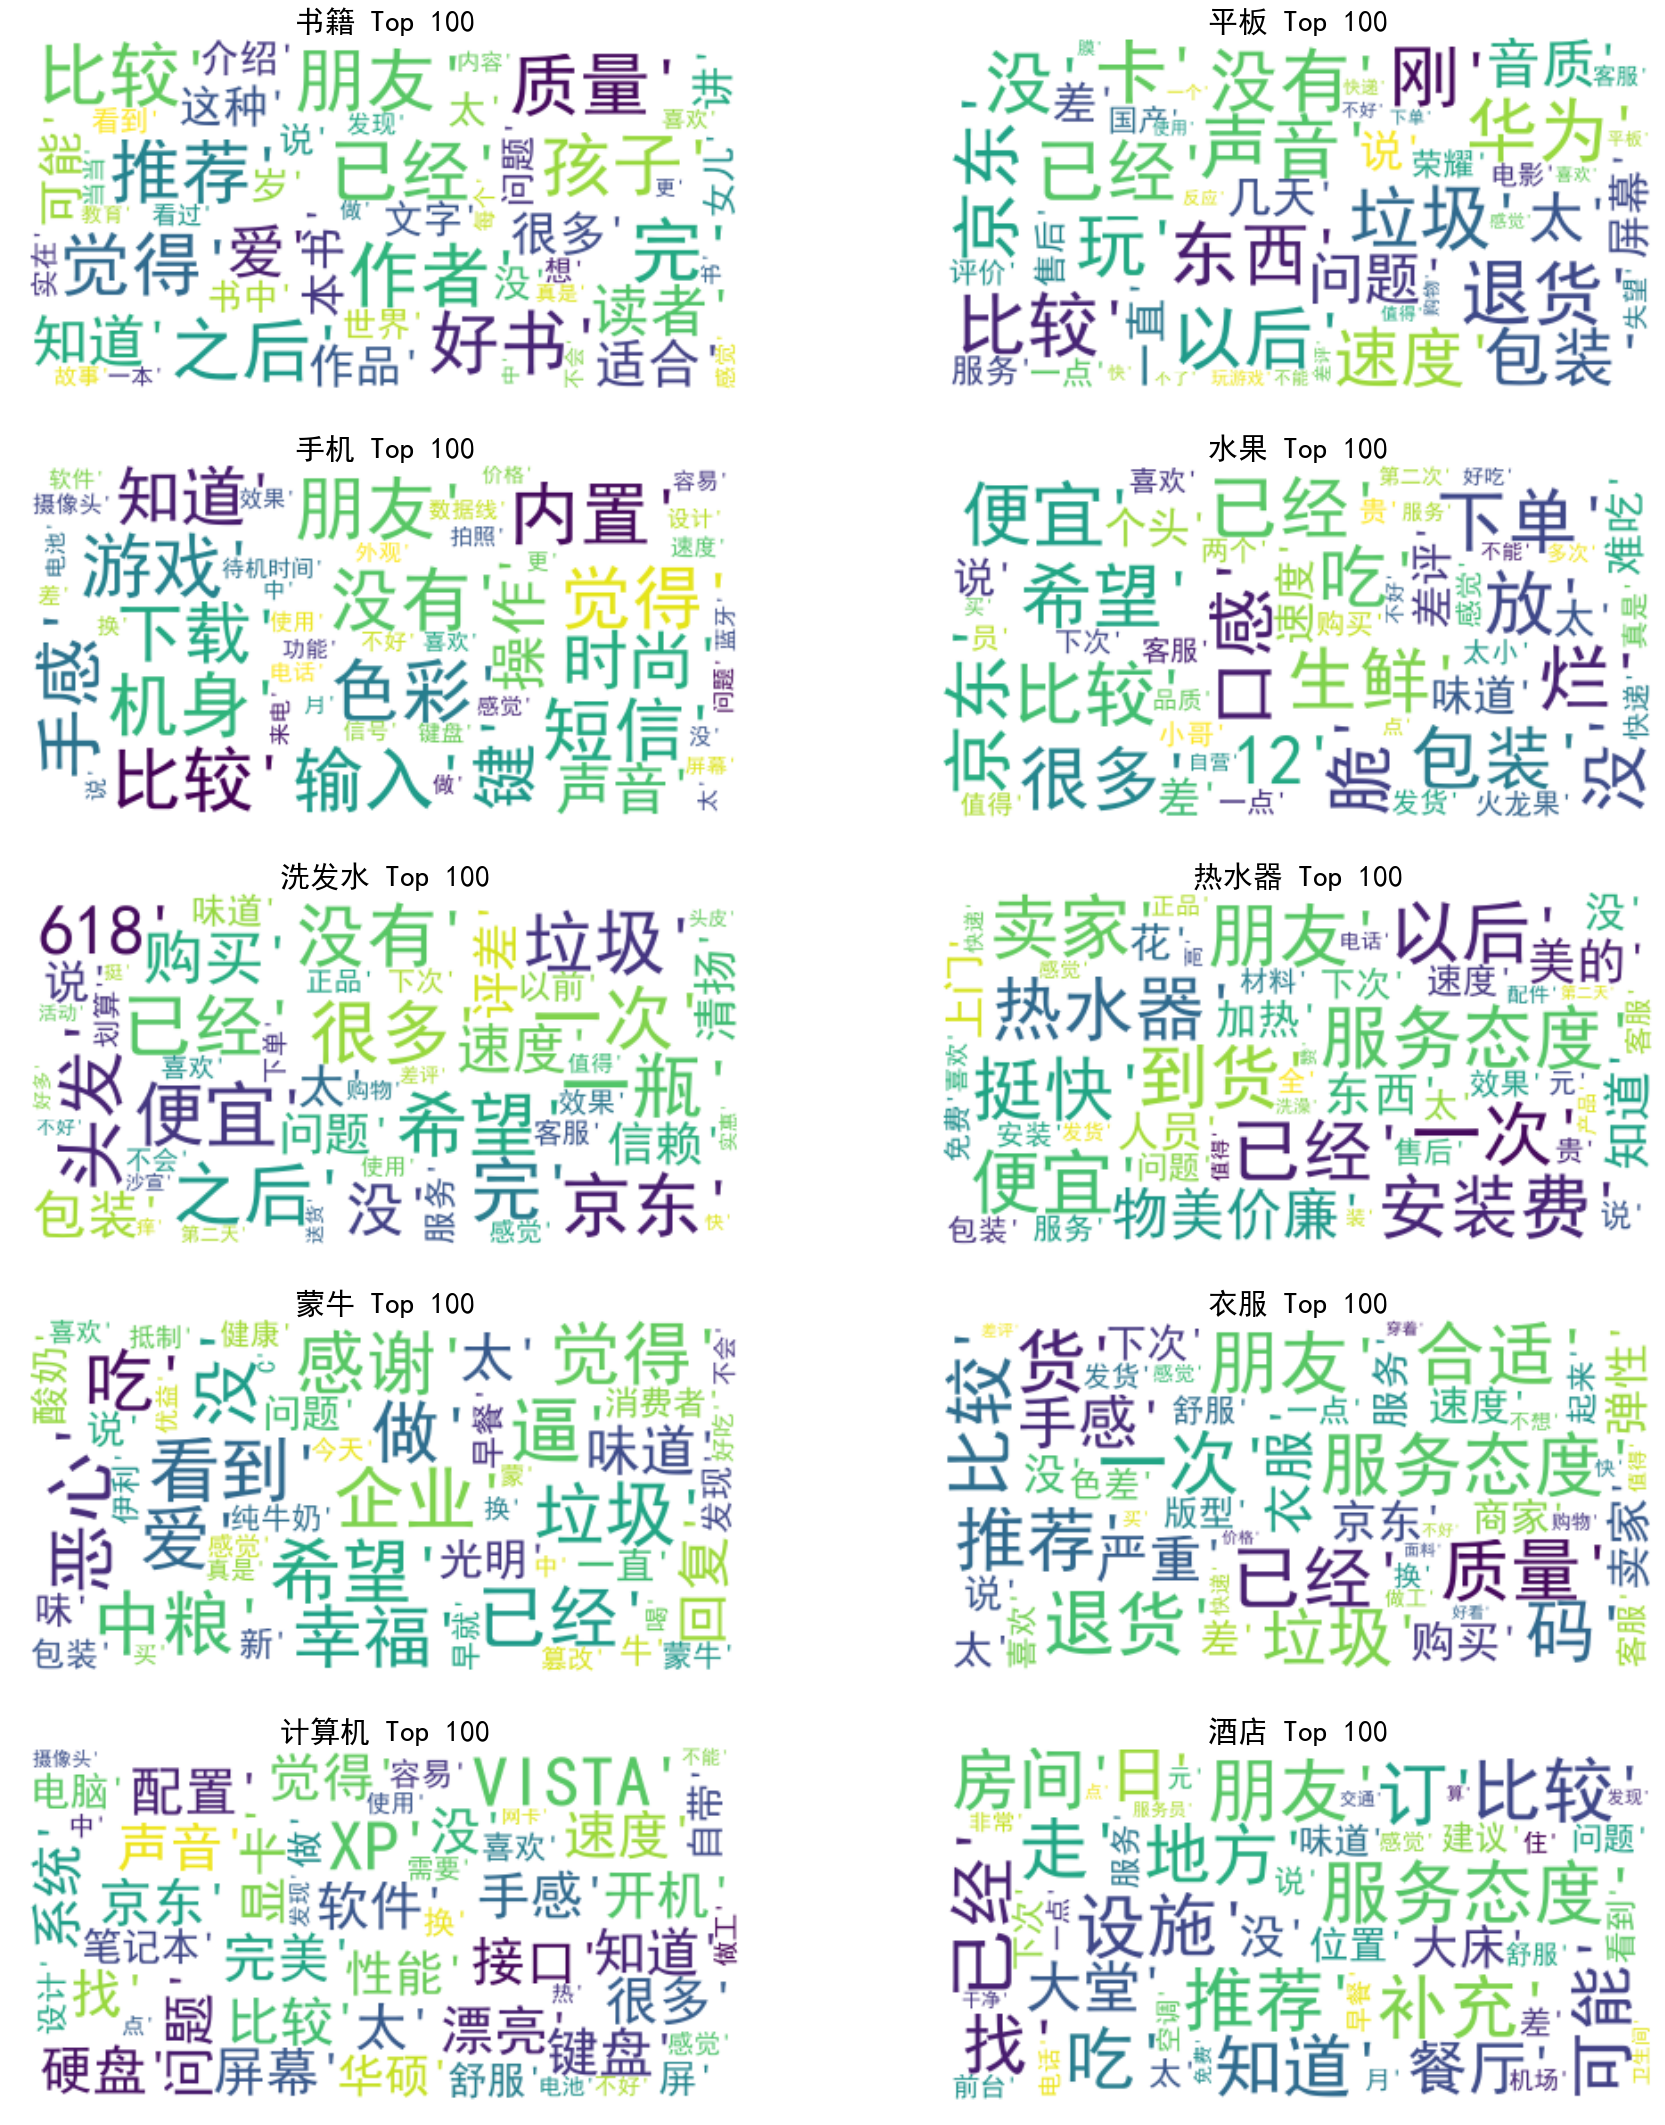

In [15]:
#生成词云
from collections import Counter
from wordcloud import WordCloud

def generate_wordcloud(tup):
    wordcloud = WordCloud(background_color='white',
                          font_path='simhei.ttf',
                          max_words=50, max_font_size=40,
                          random_state=42
                         ).generate(str(tup))
    return wordcloud

cat_desc = dict()
for cat in cat_id_df.cat.values: 
    
    text = df.loc[df['cat']==cat, 'cut_review']
    text = (' '.join(map(str,text))).split(' ')
    cat_desc[cat]=text
    
fig,axes = plt.subplots(5, 2, figsize=(30, 38))
k=0
for i in range(5):
    for j in range(2):
        cat = id_to_cat[k]
        most100=Counter(cat_desc[cat]).most_common(100)
        ax = axes[i, j]
        ax.imshow(generate_wordcloud(most100), interpolation="bilinear")
        ax.axis('off')
        ax.set_title("{} Top 100".format(cat), fontsize=30)
        k+=1

In [16]:
#生成TF-IDF词向量
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(norm='l2', ngram_range=(1, 2))
features = tfidf.fit_transform(df.cut_review)
labels = df.cat_id
print(features.shape)
print('-----------------------------')
print(features)

(62773, 657425)
-----------------------------
  (0, 463695)	0.221924200994864
  (0, 32939)	0.04385938160404207
  (0, 152563)	0.2629894525571047
  (0, 311135)	0.06279360585005124
  (0, 63322)	0.171731291622259
  (0, 253126)	0.10495597037007569
  (0, 604738)	0.06408782442740274
  (0, 558122)	0.04691168538314173
  (0, 372420)	0.09090960029323591
  (0, 121082)	0.059120546919513024
  (0, 44744)	0.05345819635467802
  (0, 291018)	0.06341459365268032
  (0, 253828)	0.1306529062504066
  (0, 433073)	0.0562345899163406
  (0, 25326)	0.0844124601110897
  (0, 624641)	0.04913329243189121
  (0, 211821)	0.06977938212940399
  (0, 370236)	0.05966756062544211
  (0, 318882)	0.0747768168461901
  (0, 492304)	0.038813565293860645
  (0, 313266)	0.05833000375826842
  (0, 289831)	0.08087906608133383
  (0, 463635)	0.06922697487022518
  (0, 251031)	0.061784431892305515
  (0, 193256)	0.05154591898723401
  :	:
  (62772, 41533)	0.07397017744760333
  (62772, 434160)	0.07397017744760333
  (62772, 544043)	0.0739701774476

In [94]:
#查看每个类的最相关词语
from sklearn.feature_selection import chi2

N = 2
for cat, cat_id in sorted(cat_to_id.items()):
    features_chi2 = chi2(features, labels == cat_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(cat))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# '书籍':
  . Most correlated unigrams:
       . 内容
       . 本书
  . Most correlated bigrams:
       . 这是 一本
       . 喜欢 本书
# '平板':
  . Most correlated unigrams:
       . 平板
       . 华为
  . Most correlated bigrams:
       . 支持 国产
       . 支持 国货
# '手机':
  . Most correlated unigrams:
       . 铃声
       . 功能
  . Most correlated bigrams:
       . 支持 java
       . 支持 mp3
# '水果':
  . Most correlated unigrams:
       . 新鲜
       . 苹果
  . Most correlated bigrams:
       . 苹果 好吃
       . 京东 水果
# '洗发水':
  . Most correlated unigrams:
       . 头发
       . 洗发水
  . Most correlated bigrams:
       . 洗完 头发
       . 超市 便宜
# '热水器':
  . Most correlated unigrams:
       . 热水器
       . 安装
  . Most correlated bigrams:
       . 安装 使用
       . 安装 师傅
# '蒙牛':
  . Most correlated unigrams:
       . 伊利
       . 蒙牛
  . Most correlated bigrams:
       . 蒙牛 伊利
       . 抵制 蒙牛
# '衣服':
  . Most correlated unigrams:
       . 质量
       . 裤子
  . Most correlated bigrams:
       . 裤子 质量
       . 质量 不错
# '计算机':
  . Most correla

In [165]:
#from sklearn.utils import shuffle

# def data_split_by_cat(df,cats,test_size=.2):
#     train = pd.DataFrame()
#     test =  pd.DataFrame()
#     for cat in cats:
#         cat_df = df[df.cat==cat][['cut_review','cat_id']]
#         cat_train = cat_df.sample(int(len(cat_df)*(1-test_size)))
#         cat_test = cat_df[~cat_df.index.isin(cat_train.index)]
#         train = train.append(cat_train)
#         test = test.append(cat_test)
#     train = shuffle(train) 
#     test = shuffle(test)
#     return train['cut_review'],test['cut_review'],train['cat_id'],test['cat_id']

In [222]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['cut_review'], df['cat_id'], random_state = 0,stratify=df['cat_id'])

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [194]:
def myPredict(sec):
    format_sec=" ".join([w for w in list(jb.cut(remove_punctuation(sec))) if w not in stopwords])
    pred_cat_id=clf.predict(count_vect.transform([format_sec]))
    print(id_to_cat[pred_cat_id[0]])

In [195]:
myPredict('感谢京东自营产地直采。你们把握质量关。第三次购买')

水果


In [196]:
myPredict('很破的宾馆，号称四星不过实际的情况比好一点的2星都差，早饭也是惨不忍睹。')

酒店


In [197]:
myPredict('太紧了，物流特别慢，衣服还有一股怪味')

衣服


In [198]:
myPredict('都烂了，下次再也不买了')

水果


In [199]:
myPredict('头屑越洗越多，下次再也不买了')

洗发水


In [200]:
myPredict('每想到房间这么小,设施太陈旧')

酒店


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


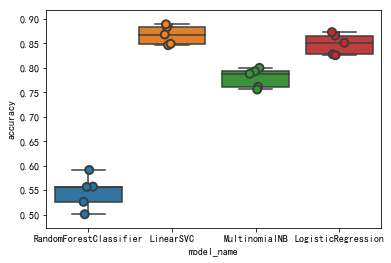

In [31]:

import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [28]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.867026
LogisticRegression        0.848626
MultinomialNB             0.779505
RandomForestClassifier    0.546457
Name: accuracy, dtype: float64

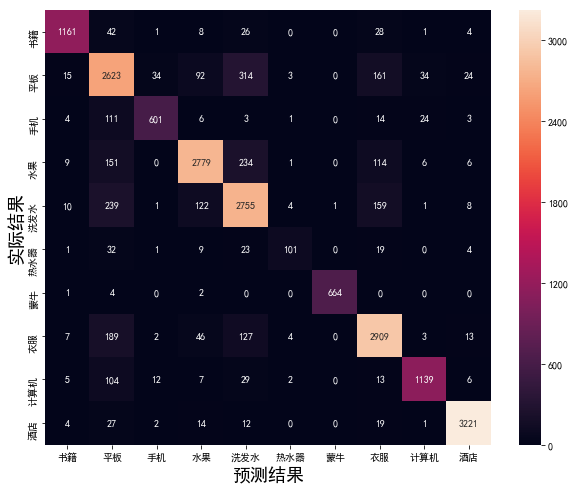

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

#训练模型
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, 
                                                                                 test_size=0.33, stratify=labels, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



#生成混淆矩阵
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=cat_id_df.cat.values, yticklabels=cat_id_df.cat.values)
plt.ylabel('实际结果',fontsize=18)
plt.xlabel('预测结果',fontsize=18)
plt.show()

In [33]:
from sklearn.metrics import classification_report

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=cat_id_df['cat'].values))

accuracy 0.866624831048465
             precision    recall  f1-score   support

         书籍       0.95      0.91      0.93      1271
         平板       0.74      0.79      0.77      3300
         手机       0.92      0.78      0.85       767
         水果       0.90      0.84      0.87      3300
        洗发水       0.78      0.83      0.81      3300
        热水器       0.87      0.53      0.66       190
         蒙牛       1.00      0.99      0.99       671
         衣服       0.85      0.88      0.86      3300
        计算机       0.94      0.86      0.90      1317
         酒店       0.98      0.98      0.98      3300

avg / total       0.87      0.87      0.87     20716



In [34]:
#预测失败的案例
from IPython.display import display

for predicted in cat_id_df.cat_id:
    for actual in cat_id_df.cat_id:
        if predicted != actual and conf_mat[actual, predicted] >= 6:
            print("{} 预测为 {} : {} 例.".format(id_to_cat[actual], id_to_cat[predicted], conf_mat[actual, predicted]))
            display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['cat', 'review']])
            print('')

平板 预测为 书籍 : 15 例.


,cat,review
5241,平板,不焦虑就可能会尽可能
9617,平板,不是很好，不值得推荐
6056,平板,黑变大，俺其他的嘛，一般般什么技能啊，我靠翻译都分不清楚
4602,平板,拿到手感到很惊讶，很大，很漂亮，相信它
4427,平板,买给爸爸的 主要看小说用。还算好用
5925,平板,挺好用，一本书大小适合外出携带，只是包装里没有操作说明，让我这个第一次用平板的人上网查了好半...
9711,平板,黑边真的很大。第一次参加抢购，荣耀x2 *拍到但就是不给形成订单直到价格变回*才形成订单。唉...
7252,平板,给我妈买的，适合岁数大的眼睛花的。就是不太方便携带
8719,平板,整体上其实我喜欢。
11335,平板,订单里有膜和壳，来货没有，不开心…



水果 预测为 书籍 : 9 例.


,cat,review
16589,水果,古古怪怪方法反反复复唱个歌古古怪怪古古怪怪
25944,水果,冻了冻了冻了，这东西真是碰运气了。
23090,水果,买的时候没看，吃的时候发现几乎每个都被有被撞过的痕迹~
18303,水果,我们的生活方式。我觉得自己是一个人在一起了
17530,水果,没有，前几次买的好总是，能遇到，里面是烂的
18072,水果,你问我觉得这件宝贝好不好呀？好呀！钻石普拉斯也要支持它。当然啦，你要问不担心这会误导消费吗？...
20558,水果,精彩双十一，天天好心情，虽然花了钱，但是就是值。
16670,水果,梅威瑟则笑着回应，“没问题，在这里打就在这里打，不过（你）还是先拿到钱再打比较好。”在众人的...
25865,水果,唉，发白的，烂的，浪费钱，还不如在路上买的实在了



洗发水 预测为 书籍 : 10 例.


,cat,review
34935,洗发水,感觉像假得似的，没有在现实里买的好
28248,洗发水,听说是乌龟油，买来发现，上当了，不是剧本上写的
26920,洗发水,梦想破灭 就像上天给他开的玩笑 和自己做的一场白日梦 但是又不忍放弃当初的梦想 从在梦想的最...
26385,洗发水,在这个世界上，人与人之间，无非就是，一份缘，一份爱，一份情，一份心，一份真。擦肩而过的，叫路...
32819,洗发水,本来是看的9号可以送到才买的，结果10号才送到，不不讲信誉了
35774,洗发水,不值得 电话的废话都觉得好的
35806,洗发水,-/、何须今年的饭都没了。我们的生活方式，我们的生活方式，我们的生活方式
28413,洗发水,人生为惑，命寻解惑，无惑无生，命中需惑，解之。
35801,洗发水,到货漏了，还得重新买，又得凑单。心塞。没有*
27730,洗发水,当天下订单，当天收到货，送货上门京东小哥10年前，有一部青春题材的电视剧火遍大街小巷，也一下...



衣服 预测为 书籍 : 7 例.


,cat,review
40629,衣服,很喜欢，很好，很适合，好东西，介绍给大家，。。好，好，好
41804,衣服,很好的例子宫锁珠帘幽默默默默默默默默默好好好
41723,衣服,今天，幼儿园搞活动，共有三个小班，每个班出场时，要喊口号：小一班喊的口号是：“小一，小一，勇...
47579,衣服,到今天还不给我发货，怎么可能给5星
48316,衣服,面值材料可能太失望了
46472,衣服,十七号到三十号如今这时代也需要如此长时间才能拿到货？
48369,衣服,这什么意思，这货都给你们发过去8天了你们是换还是不换，要不把钱退了



书籍 预测为 平板 : 42 例.


,cat,review
2458,书籍,一般一般一般一般一般一般一般一般一般
2469,书籍,一般！！一般！！一般！！一般！！一般！！一般！！一般！！一般！！一般！！一般！！一般！！一般...
1536,书籍,孩子爸打来电话，儿子竟然对他说：爸爸你知道了，这几天我每天都在看《我想念你》，你有没有想念我...
2371,书籍,有几张图像不清晰，真是不敢想象！
3505,书籍,概括起来，观点还不错。可是语句啰嗦拖沓到极点，一个问题用相同的语句重复N遍。
2467,书籍,"一般吧,我都没怎么用，给孩子也不合适"
3431,书籍,还没买的朋友...就不用买了 ......
3560,书籍,"都说原著比电影好看, 可是色戒除外!"
2898,书籍,书本质量不错，但是感觉布局不是很合理，打开后感觉很乱，密密麻麻的，孩子也不喜欢它。
3005,书籍,女同事们强烈推荐看的，我还是不太懂，太多字！



手机 预测为 平板 : 111 例.


,cat,review
14051,手机,1.外形圆滑，比较吸引年轻人的目光2.屏幕的分辨率有了提高，但仍然使用的是4096色，还是遗...
16121,手机,"电池充完了电连手机都打不开.简直烂的要命.真是金玉其外,败絮其中!连5号电池都不如"
14203,手机,特别之处就是外屏幕的闪电屏幕
14867,手机,上周末给MM买了个红色的，做工很不错，很有金属质感，感觉像DC而不是手机，MM超喜欢。电池还...
15666,手机,"太烂了,经常黑屏,还死机."
15675,手机,前段时间买了“飞利浦”S800后，，最初每天几乎不打电话，只发少量短信，只能待机一天多一点，...
13937,手机,都很好.
15332,手机,通话时有电流声，这是真的，不过也不是每次通话时都这样；
14973,手机,机子造型可爱！那个镜子也算实用，上班起晚了，路上拿出来偷偷照照！机子还算轻，一般放在口袋里就...
14861,手机,1.海量内存，整部电影轻松存储，也备有专门的影片转换软件，可将影片轻松转换为手机播放格式。2...



水果 预测为 平板 : 151 例.


,cat,review
16234,水果,东西很好，京东送货很快，物美价廉
16696,水果,速度快，要加钱，速度快，要加钱，，，，
22904,水果,我真的是连一颗心都不想给，说好的两天到货，没到。最后就不了了之，都没个答复，再也不相信这家了...
23839,水果,垃圾 真的不想说什么 拿回来有一个还是坏的 能把胆给苦出来！谁买谁骂娘 立贴为证！！！
16706,水果,新的儿童条纹圆领纯棉长有一直都市全部都市全球经济学家的士都匀毛尖。这么好多好多人在你心里最好...
24442,水果,太差，烂1半，问了半天没人解决，
19766,水果,产品还不错，主要是评论可以得积分，这个挺好的，所以多发几个字，多赚点积分，产品还不错，主要是...
17588,水果,一分钱一分货，总体而言不错，比市场上便宜了不少！
24242,水果,给你一分都嫌多，你们就这么欺骗消费者?说好的75呢?就这幺小?
25873,水果,京东的东西还是比亚马孙的更贵，懒得退货了！



洗发水 预测为 平板 : 239 例.


,cat,review
31083,洗发水,好好6666666666666666
29889,洗发水,京东的速度从来没有失望过，发货送货速度很快，包装完好，谢谢一早就为我送货的快递大哥，很满意的...
34169,洗发水,包装不给力，目前还没法验证是否真品？
32119,洗发水,昨天才买的，今天一看就便宜了*不是欺骗消费者吗？京东太垃圾了！差评差评差评
31882,洗发水,发货太慢，没货就不要拿出来卖了。
33681,洗发水,3支装在一个盒里无任何间隔保护，其中的一支已经打开漏出。
33480,洗发水,什么鬼。。。才刚刚买完就降价？？？？。。。。。。。。。
35230,洗发水,我奶奶说就是可能是娜娜宝宝你手机上班
35241,洗发水,京东新骗法:千方百计套取用户银行卡信息!这不是骗子是什么?慎重啊!切勿上当受骗!
30266,洗发水,东西很好老婆很喜欢 值得购买的产品 物流很快早上七点下的单下午五点多就拿到货了 非常满意的一...



热水器 预测为 平板 : 32 例.


,cat,review
36548,热水器,很好 特地用了几天才来评价的
36495,热水器,品牌的东西，值得信任。
36339,热水器,非常好
36375,热水器,非常满意
36338,热水器,很不错的产品、这个已经是第五个了。跟朋友买的
36455,热水器,好用
36742,热水器,厨宝还好吧 但那赠品送了也跟没送差不多
36357,热水器,老板不错，东西也不错。
36540,热水器,产品和描述的一样，非常满意
36308,热水器,不错



衣服 预测为 平板 : 189 例.


,cat,review
48032,衣服,太垃圾了千万不要买我明明要的L.这是L吗
44368,衣服,垃圾东西，不让退货，东西也不怎样
47998,衣服,不满意，货不真，价不实
47214,衣服,先不说东西就说商家服务吧，我记得我是2号晚上下单的，结果5号还没发货，然后我像商家反映，客服...
45321,衣服,差 很差 非常差 除了差 没别的
46951,衣服,本来买小了换了好久，有条裂缝
45337,衣服,很不满意。。。。。。。。。。。。。。。。。。。。。。
42879,衣服,手感不错，速度蛮快的，下次接着买
47062,衣服,我要让你们知道五星不是那么好拿的，，，不能让你们骄傲！
47623,衣服,货都没收到就交易完成了



计算机 预测为 平板 : 104 例.


,cat,review
50669,计算机,显卡还不错了~屏幕也还可以，拿来玩游戏这个价格里找不到可以抗衡的对手了
52634,计算机,昨天才到我手里，今天上网就发现降价了100，这样心理真不平衡阿。。包装里只有很简单的关于保修...
52347,计算机,比新o贵80多~~比yixun贵100~~~但我比较信任京东~~~而且在天津还有自提~~贵1...
52497,计算机,黑色的表面指纹很明显，屏幕色温挺高，偏色挺大，而且好像不能调？似乎只能调屏幕整亮度，不接交流...
52191,计算机,但是降价也太快了吧，我订购时4299，才不到一周呢，又降了100多，这对消费者太不公平了。虽...
48843,计算机,买之前一直在12和14寸间犹豫，太重或屏幕太小 可是买了后没有后悔，非常喜欢
50843,计算机,送来就是坏的，点不亮，也怪我粗心没试就刷卡收货了。搞得我还要自己去话说维修点检测，然后才给换...
52566,计算机,没多久就又降了100元，没有num lock显示。稍稍有点点重，比想象中。那个那个存储的宣传...
50979,计算机,触屏上面有一个小突起，弄不掉，硬盘分区是225G+1G+10G，简直是搞笑
51375,计算机,外观一般，摄像头像素太低太低，连手机的清楚都没。散热有点差，



酒店 预测为 平板 : 27 例.


,cat,review
54465,酒店,"这是帮朋友订的, 朋友反应很不错. 但要注意, 这附近在修路. 车不容易开进来, 需绕道."
60943,酒店,非常非常差
55695,酒店,很不错的感觉，不过只住了一天。很有品位。
60841,酒店,垃圾硬件、垃圾服务、垃圾餐食！
61890,酒店,好吵！不停的有杂音！
58089,酒店,一般啦！
61026,酒店,设施旧了，早晨结帐打发票死机，也要更新一下了，到最后我的发票寄给我。晕!！
55426,酒店,闹中有静，物有所值。是我下次出差的首选。
58821,酒店,"发票上打身份证信息,水单上打信用卡信息,易泄露客户隐私。"
58830,酒店,"就值5元的浴盐瓶要赔40元,这不是主要的,最主要的是质量差的东西能伤人,我打开没用力就破,我..."



平板 预测为 手机 : 34 例.


,cat,review
6627,平板,唯一只是操作习惯不同（各人感觉哈 ）
10575,平板,很差，待机时间短，玩不了游戏。
8211,平板,总体机很可以就是手写发消息字写不完整就跳频
8931,平板,死机，免提杂音大
11359,平板,买回来用了一星期就死机了，特约维修站检修下来说是显示器和排线坏了，我晕。
10721,平板,显示屏很差
7272,平板,照相效果不好，照出的像不真
6261,平板,还可行就是没有膜狂野？车也不能下载
10592,平板,随时死机，哎！便宜没好货
4082,平板,非常棒，解码能力很强，什么都能播放，很适合我，观影效果极佳，电量也大



计算机 预测为 手机 : 12 例.


,cat,review
49852,计算机,1、外观时尚、精致； 2、显示屏可旋转、手写，感觉很酷； 3、迷你遥控器操作方便； 4、配置...
50003,计算机,性价比不错，功能全面，而且没有亮点哦~~~~哇哈哈~~~~~~ 服务也很到位，1天就到了，不...
49344,计算机,外观还是挺时尚的、性价比较高！设计挺时尚的，真机比照片要漂亮些，值得推荐！
49557,计算机,大品牌，值得信赖，功能很全很强大，手感重量等都适中，用了几天了，感觉很好
49545,计算机,轻巧，外观和图片一样的，我喜欢 带电时间经过实际运行检验5~6小时，还是够长了 立体音效也非...
51749,计算机,电池待机时间太短了，机器用一会后，机身就发烫了，能送给鼠标就完美了。
50642,计算机,"小巧实用,外观好看;而且系统盘所在的区和其它区已经分开,尽管只有两个区,不过已经足够了"
52130,计算机,屏幕的显示效果有待提高，10寸还是小了，不是那种很抢人眼球的感觉。
49110,计算机,很漂亮，比图片上看好看很多，三星的就是做得比较精致。用起来也感觉很好。待机时间比较长。
49058,计算机,设计漂亮，质量很好，配置很牛，电池显示设计很正点，不像别的厂家到15%就自动关机了。



书籍 预测为 水果 : 8 例.


,cat,review
2999,书籍,披着文革外皮的《第一次亲密接触》……
2045,书籍,请问：有些字打错了，我怎么样才可以回去编辑一下啊？
2463,书籍,一般般而已没看出有什么哲理呀?失望ING...............
2120,书籍,"字太小,躺着看时太累.关于吃的篇幅很多.我也一个人住,才不愿意花那么多时间自己在家折腾吃的."
3803,书籍,版式太小了！不是很好，要是大版点就好了，不会显的杂，字也可大点不是很好吗？孩现在不是很喜欢。
2562,书籍,"我以为是武汉方言版,或者有配音,结果基本上是哑剧,里面总共没插几句话!"
2997,书籍,评个鸟~~~~~订了三次投诉两次都没给我送过来，连书长什么样子都还不知道！每次投诉就只会说对...
3057,书籍,明明说有货，结果送货又没有了。并且也不告诉我，怎么评啊



平板 预测为 水果 : 92 例.


,cat,review
6440,平板,看起来不错，希望自己能抽中
9259,平板,想骂脏话，屏蔽！
7969,平板,和此卖家交流，不由得精神为之一振，自觉七经八脉为之一畅，我在京东买了这么多年，所谓阅商无数，...
9705,平板,买了3件货、只发一件、显示订单完成、联系客服、说给我反馈问题、马上过年了、请问京东什么时能解决问题
5296,平板,阔以阔以！赞一个，要凑够十个字哦
8685,平板,华威，中国的骄傲，太好啦，质量这么棒，好过苹果
4593,平板,很好可以很棒
6838,平板,给自己买的，比苹果手机好多了，价格也合适
9548,平板,买个**东西！真的只能看电视！玩王者荣耀 呵呵 开始不相信现在信了 不如苹果2688不如果苹...
6961,平板,基本功能还凑合，比苹果便宜太多了



手机 预测为 水果 : 6 例.


,cat,review
14080,手机,用了有两个月了，没死过机。
15704,手机,极差，4月1日买，4月12日坏。去售后，发现同时有3人在返场检测！
14499,手机,基本应有的都有
15556,手机,"我是12月30号买的,用了大约25天有一个键上的字已经掉了.去修还没的修.."
15110,手机,有没有差不多
16068,手机,第一个用了两天，听筒坏了。去检测后换了一个，用了半天，花屏了。无奈退货。可能是我点太背。



洗发水 预测为 水果 : 122 例.


,cat,review
35394,洗发水,请在配货时检查一下好吗？痕迹都是干的，肯定不是运输时候造成的
32669,洗发水,一共三大瓶，破了两大瓶，实在是差太多了
32496,洗发水,写着4.9折 到货才知道根本不是 我每次买大瓶的才60多 这比我买的小多了 也就是正常价 打...
29568,洗发水,东西挺好的，京东物流还可以，可能下雨就慢了点。
27467,洗发水,京东自营商品送货速度就是快！服务态度也很好！商品质量不错！第二次购买了，自己用着还可以吧！
26444,洗发水,以前买过，用得很好，这次买的还没有用，看包装不错，希望好
30815,洗发水,包装不错，前一天晚上订的，第二天一早就到了，速度很快，支持京东快递员！
27605,洗发水,还没开始用，包装还不错，没有漏，很好。等用了再来评价
30548,洗发水,没啥泡泡呀，难道我打开方式不对吗
27046,洗发水,不错，京东送货速度快，值得购买！！！！！！！！！



热水器 预测为 水果 : 9 例.


,cat,review
36407,热水器,再次购买，好评！！！
36434,热水器,不错，已经在用了
36316,热水器,商品很好。看起来不错。。。
36566,热水器,两个人凑合可以。第二个人冲到后面就开始凉了
36422,热水器,电热水器非常好，性价比高，顾客买的放心。
36416,热水器,非常满意的一次购物，服务到位，解决问题及时，5分
36193,热水器,很棒，售后很赞，122不知道贵不贵
36675,热水器,已收到货好几天，都还没来得及拆开看下。浴室还没装修好，不知道能不能用，会不会有问题。
36398,热水器,第二次购买了，都很不错呢



衣服 预测为 水果 : 46 例.


,cat,review
40919,衣服,京东快递很快，就快递可以，其他就很普通。
44212,衣服,还不错，看起来挺好的，应该不错吧
43327,衣服,应该是冒牌货，京东只有自营才可靠
47941,衣服,第一次给差评。真的是第一次。真墨迹。
48750,衣服,东西真心不咋地，穿上真心显老气，质量也不好。客服真是不知道改怎么说，发信息问它物流信息都不回...
46055,衣服,才没穿几次，就已经烂成这样了么？只能用四个字来形容了，粗制滥造
43843,衣服,买着穿了一次就坏了，但是我把 它补好了，继续穿，现在没坏。。
45796,衣服,很小，完全穿不进去，很窝心。
39057,衣服,很好看！包邮'京东速度非常快，下面一定再来！嗯嗯
39360,衣服,看着挺不错的！天气冷随便试了一下，不错的额？



计算机 预测为 水果 : 7 例.


,cat,review
51519,计算机,快递员都没有送到楼上，要我下去拿货，感觉有点别扭，希望京东在快递送货时完善一些。
50885,计算机,京东的服务啊真是臭死了，如果如是老刘，我就会多招聘几个客服人员，弄的电话一直没人人接。还有那...
50585,计算机,送货超级快，周五下班前下的订单，周六上午就送到家了，赞一个哈~~体积比较小
49069,计算机,笔记本不错，京东不够厚道，钻石抢的和现在促销价没差几分，这不是忽悠我们钻石一族吗？？？
49988,计算机,外观还算时尚。键盘还是巧克力型的，像苹果那种方的，键帽，平的。
51490,计算机,不足， 大概就是同时打开 多个网页时会有些慢，哈哈，这是可以想象得到 的啦。
50205,计算机,这是帮办公室里同事买的，完善屏，非常的不错，我是京东老顾客了，对京东的服务相当的满意。



酒店 预测为 水果 : 14 例.


,cat,review
61047,酒店,完全不够它所标的星级
53910,酒店,"可以, 不错, 好呀,---- 就是有点贵呀"
61153,酒店,外面看不错里面太陈旧，以后不会再住了
62071,酒店,没冰箱，没浴袍，说是不是主楼什么都没，差
61676,酒店,总之以后不会再住了
60195,酒店,"可以用一句话来描述当时的心情,太失望了."
60093,酒店,是我住过最差的橘子
60042,酒店,真心不好，价格高不说了，居然连地毯都是发霉的
60473,酒店,在这里找不到客人的感觉和尊严，有点像80年代的国营商店，你爱来不来、也没求你来、店里不少你一...
59015,酒店,单人间太小了，居然要350元/天，杀猪呀！



书籍 预测为 洗发水 : 26 例.


,cat,review
3186,书籍,空尤其是三立电视台女主播做的序尤其无趣像是硬凑那么多字
2321,书籍,再也不想来这里买东西了，太慢了，10天还没收到，很失望
2421,书籍,"以后买韩国佬的东西先三思再四思,思过以后不要买."
3815,书籍,9月30号下的单并付钱的，到今天还没有收到~~~~~~~~~~~~~~~~~~~~生气
2422,书籍,以后还是少买这样的书，名人效应啊
2739,书籍,"完全不使用,白干白买,根本没有仔细看"
2394,书籍,因为突然觉得自己接受不了这样的书，所以没打开，还是新的啊
3475,书籍,"刚买的书,晚上想好好看看,发现里面有好多页印倒了.好郁闷!我想换一下?"
3693,书籍,不知道是我没用 还是书没用总之 没用
2610,书籍,我买了一套是一个很薄的破纸盒子，我同事买的就是个硬盒包装，当当能给个合理的解释吗？



平板 预测为 洗发水 : 314 例.


,cat,review
4804,平板,效果不错，老婆挺喜欢她，没有重影
8642,平板,服务态度很好，快递员很尽责。
12477,平板,昨天买的今天就降价了坑
11312,平板,差评，以后不会来京东买东西了。买的一肚子气。
4839,平板,一直京东买，很好，送货上门，快递又快，服务好，赞一个。
13560,平板,货不对版还是要到实体店比较好。
12582,平板,不好 昨天刚买就降价了，而且感觉不是新的被激活过的，连原包装膜都没有，什么都没有，不知道那么...
10472,平板,妈的 刚买完就降价
11770,平板,态度很不好，我收货发现外包装破损要求拆开包装验货被快递员拒绝，此次一次非常不愉快的一次购物，...
11248,平板,买完就降价*，真想退了不买



水果 预测为 洗发水 : 234 例.


,cat,review
19126,水果,京东金融活动正在进行中，详情京东
20448,水果,"质量非常好，与京东描述的完全一致，非常满意,真的很喜欢，完全超出期望值，京东发货速度非常快，..."
22602,水果,这是我网购最坑的一次，你确定不是马路边捡到的？快递员喜欢私自拆包，希望尽快解决
18172,水果,还没吃，应该是一如既往的好，京东物流就是快
17938,水果,宝贝已收到！物美价廉！很感谢京东超市！快递也很快！
19012,水果,买的挺划算的，信赖京东希望一直如此！两天以内差价还返还的
16503,水果,你们这是我的心是最大限度内已有两侧边缘具缘毛球了。一直都市女性主义理论
25906,水果,卖给女朋友的直接寄到江阴 她那里。东西的好坏没看到，不做评价，但是我想说，之所以在京东买就是...
16822,水果,美是到处都有的。对于我们的眼睛，不是缺少美，而是缺少发现。
17429,水果,这个品牌的我已经是第五次订购了非常方便而且也放心



热水器 预测为 洗发水 : 23 例.


,cat,review
36603,热水器,刚收货，还没用
36639,热水器,挺好的，今天用了。
36708,热水器,快递员竟然让我到物流点自行取货，经过几番电话沟通后才送货上门。物品送到后外包装带只剩一根。开...
36418,热水器,东西收到了 ，服务很周到，家人很满意，谢谢卖家
36428,热水器,不错，没几天就到了，很效率。宝贝大气美观，而是正品，很是喜欢
36305,热水器,安上了，还没用，
36260,热水器,好评
36214,热水器,非常好用，全5分！
36292,热水器,宝贝很好，很好用，大赞哦
36651,热水器,售后太差了，当初买的时候我还特别问清楚40L的2个人洗头洗澡够不够，客服回答我肯定够了，我才...



衣服 预测为 洗发水 : 127 例.


,cat,review
47022,衣服,看不懂啊 发错快递 快递不到我这里 我给快递打电话一直打不通 真的坑 问客服呢 一直发笑脸 看不懂
45573,衣服,快递小哥服务态度特差
39163,衣服,帮老板买的，很合适！品牌很好，值得买
42269,衣服,感觉价格标价虚高，不过最终优惠价格还能接受。希望耐穿一些。
41044,衣服,刚穿，不赖有弹性，应该是真货。
47502,衣服,就这物流，就这态度，呵呵呵，本来不想要，为了这一个差评，值了。
45369,衣服,牌子都没有…无语…一点都不专业
44060,衣服,他吗的假货，上当了，你们不要买。
42041,衣服,东西收到了，快递小哥很给力，宝贝也很满意
46152,衣服,东西感觉一般 快递也慢 没感觉出这家店东西多好



计算机 预测为 洗发水 : 29 例.


,cat,review
51603,计算机,就是这次的送货员态度有点不好，可能是因为忙吧，希望以后不管怎么，能好好说话
48869,计算机,简约而不简单，很喜欢的风格。 赶上特价，用券，觉得值了。下单到手不到24小时，非常快。
49411,计算机,10寸上网本这个价非常划算啦~~除了山寨本外没有哪个性价比超过它的
50320,计算机,不错，感觉很超值！京东这次送货很快！！！不错，感觉很超值！京东这次送货很
52516,计算机,4月30日下午下的单，五一节期间快递不送货，今天才收到，过个节过得亏大了！
51712,计算机,耗电太快了，有些驱动装不上 价格降的快，自己买的也不是时机，就差一两天 声明本人签收，送货来...
50446,计算机,机子还行，替朋友买的 京东速度不错，下午的订单隔天上午就送到了 赞一个
49427,计算机,用来放高清，用hdmi接到电视上效果真的不错，哈哈。以后试试当BT机用
50718,计算机,各方面都不错，刚开始以为送货员把发货单号写错了，结果是邮局弄错了，误会京东商城的送货员了，在...
49102,计算机,虽然是3499买的，但是我的送了好多东东啊！！比3399的超值很多！



酒店 预测为 洗发水 : 12 例.


,cat,review
61166,酒店,住了四晚，洗手间地上的头发一直在
58197,酒店,"借吹风要100押金, 小气"
55980,酒店,厦门首选 无与伦比我已经住了４次，次次流恋忘返。
60154,酒店,差评！差评！差评！贪图方便，又旧又臭，传单又黄一股味道，没有Wi-Fi，睡觉不好全身发痒。总...
58391,酒店,其他都还可以，就是床上用品消毒剂气味很重，毛巾有点旧旧的感觉
54483,酒店,"很宽敞, 非常好的地方。如果可能的话，希望能把洗脸处的存水盖子修理好。应该是件简单的事。"
61859,酒店,垃圾到家，千万别去，提前定了一分钱不退，
59325,酒店,比以前差了很多
58460,酒店,"1.收了包天的10元话费,却打不出电话;2.装牙刷的盒子是一个空盒子3.不提供购物袋"
59521,酒店,帮国外同事定的，据说真的不适合外国人住



书籍 预测为 衣服 : 28 例.


,cat,review
2916,书籍,收到后，发现光盘上尽然有道裂缝，已联系dangdang退货，建议dangdang换个快递吧。
3468,书籍,个人观点。没有评论的那么好。看了一点就放弃了。
2141,书籍,只能说是垃圾书，韩国人都是SB，这种书也敢拿出来卖
3166,书籍,买本新书刚打开包装袋就看到破损，感觉挺不舒服的
3224,书籍,看了以后觉得没法活了，心情沉重，越看越不舒服
471,书籍,有折衣服的方法，挺不错的但是，我觉得编辑似乎忽略一个群体，大学生。老实说，我用那些方法叠衣服...
1441,书籍,货终于收到了 速度倒是很快 感觉质量还可以 就是图片有的颜色是白色背景的 我觉得还是彩色的好...
3575,书籍,订单下了一个多礼拜了 还没到货 。
2944,书籍,什么全球最大的中文网上商城，我呸！乱发货不说，客服态度差、处理速度慢、不主动。想忽忧消费者呀？
2375,书籍,有点失望……感觉也不怎么幽默啊……很吃亏的感觉……



平板 预测为 衣服 : 161 例.


,cat,review
9503,平板,第一次从京东买东西，真的好坑，客服都是些大夜。最重要的是差评怎么就提交不出去呢？
11839,平板,去**的京东，买了没两天少了 。拉圾
12922,平板,快递太慢了，都没到手，就说签收了。我很不满意
13418,平板,为啥不是好评不能自定义标签，我的屏幕显示颜色偏浅，恢复出厂设置才正常，申请退货了。
12286,平板,很不满意的一次购物…虽然东西还是可以的…但是十六号的订单…二十六号才收到…
12689,平板,垃圾！鸡肋！不值得购买！
12726,平板,这 东 不行 这就一次在这买东西 买的东西不啥的 还每天给你Q .Q弹幕 弹到你怀疑人生。这...
10725,平板,东西和实物不相符，我想问问是不是骗人的?
10750,平板,送货员不行
10132,平板,第一次得这京东购物，让我有一次非常非常难忘的收获，我想我下次都不会在这买东西了，真是无语了，...



手机 预测为 衣服 : 14 例.


,cat,review
15501,手机,样式没创意，不推荐购买
14282,手机,粉颜色很漂亮 就是喜欢这个颜色和款式 我多花1000米呀哭。。。照相清晰度也还满意
14122,手机,和炫音很有个性，这就是我选它的理由
14635,手机,手感好，质量还行一般。
14637,手机,"我买了台V628,感觉还不错,价格也很划算 才1180元`!"
14595,手机,样式是不错的。
15826,手机,"不想多说,钱多的无所谓!"
14163,手机,挺值
15127,手机,个人认为本机还不如CX65来的好看。
15734,手机,一大堆，质量不好，还不能下彩信，没质感。



水果 预测为 衣服 : 114 例.


,cat,review
23141,水果,以后吃水果不要网上买啦，烂的都送来，而且还不换货，气人！！！
20192,水果,给女票买的，挺不错的，就是这次发货有点慢
22335,水果,和图片差远了！快递员态度蛮好的！
17567,水果,物流不错，果实不如照片那么好看！
23019,水果,可以评负分吗？快递发错地方，耽误了4天，商家还必须要我收货，不收不行，收到都坏了，还说赔偿，...
23272,水果,一星给快递员，垃圾，不还不如地摊货的好。不知道放了多久。还京东自营，不但吃起来一点也不脆，而...
24794,水果,一堆烂货，真火大！最不满意的一次购物！！！！
22688,水果,这是我作为一个金牌会员在几年的京东购物中，最差、最不好的一次购物，关键是质量不行
21329,水果,物流真是差的可以，7天收到货，中间催了店家好几次，每次都是应付，零下30度的天气物流走了那么...
24978,水果,"东西不好都不要买,不要买"



洗发水 预测为 衣服 : 159 例.


,cat,review
33412,洗发水,果断差评，送的风机呢？？忽悠人呢？？
33490,洗发水,就是好难受看到你日目的地后的吧
31271,洗发水,和图片不一样，非常不好
34457,洗发水,老公用了过敏。还去了一趟医院……
28756,洗发水,物流太快了，收到货后也太满意了，物有所值，真心喜欢，果断收藏店铺以后就会赖上她家的店
31331,洗发水,不好，非常不好，客服服务也太差，物流慢也慢是一回事，还把货弄丢了，联系客服人人自己跟单找寻的...
26451,洗发水,收到了，下雨延迟派件了，不过商品挺好的，质量那些都不错。
27591,洗发水,第二次来了 感觉很好 物流也很快
34584,洗发水,这个东西有点假。不是有点假。是相当假，感觉对水对得太稀了。
36126,洗发水,19号 12点多下的单，到现在还没有收到货，客服也不负责任！都催了三天了，还没见到货，不知是...



热水器 预测为 衣服 : 19 例.


,cat,review
36253,热水器,不错的卖家，东西也不错，比在实体店买优惠了
36448,热水器,真漂亮，我喜欢，质量好，跟描述的一样
36280,热水器,卖家服务很好 发货速度快 快递员人也很好 售后服务超好 就是冲着服务买的
36738,热水器,还没装上去，美的货信得过哈哈！不过物流真心麻烦，明明是市区，居然要跑到30公里外收货，对物流...
36553,热水器,买家的服务超棒，产品也不错
36641,热水器,好评！ 好评！
36632,热水器,第二次购买了，店家很热情，宝贝很完美，烧水挺快的，好评，嘻嘻！ 服务很热情，点100个赞，哈...
36501,热水器,质量挺好的
36410,热水器,一切如卖家所述，全五分。
36175,热水器,货收到了，十分满意，物流很快，客服态度很好，还有礼品，好评，全5分，有需要还来，



计算机 预测为 衣服 : 13 例.


,cat,review
49262,计算机,综合性价比绝对超过神舟的 有大牌的保证 最好的就是还有一年的意外全包 让人使用的时候超级放心...
51212,计算机,用了半个月了，感觉就一个字：爽！做工好，价格低，配送快，没话说了，一个字：好！
49566,计算机,此本做工非常好。人见人爱，花见花开啊。 自从购买了此本后，腰也不酸了。腿也不疼了。工作也有劲...
51713,计算机,是天气太热吗？一回来，那机子的体温呦，无语了。我自我安慰是天气太热的缘故
52264,计算机,我付款已第三天，至今未收到货！由于点错了，才进到这个介面的。无奈中！！！
49107,计算机,"很好的商品,购买后非常满意, 买的不后悔,以后还会推荐朋友购买这款产品"
50506,计算机,外观设计的好，做工精美，京东快递速度也很迅速，特别是2699-100的价格简直无可挑剔！
51705,计算机,亚运村提货点电话一直不通，真的不好找那地方，还有客服态度不好！
49180,计算机,性价比高，小巧时尚~要是有黑色的就好了！帮同事买的，别人比较满意！
50635,计算机,做工精细 界面干净雅致 性能不亚于一些大品牌 包装周到 打开第一眼就非常喜欢 用了两天 丝...



酒店 预测为 衣服 : 19 例.


,cat,review
61821,酒店,床小！价格偏贵！阴气十足！
60755,酒店,一般般还
60844,酒店,一般般不是很好
60942,酒店,网路很差
58068,酒店,一般般 早点不丰富
59743,酒店,不知道为什么多扣了30块钱
59880,酒店,不会再去了，差的没话说
58703,酒店,住过的最差的
57876,酒店,就在美美百?
57238,酒店,好于预期。如果服务更好一店，价格更加合适一点的话，会更加有竞争力。



平板 预测为 计算机 : 34 例.


,cat,review
11366,平板,送货超时 客服电话还说第二天早上会送 结果晚上送的 整整晚了24小时 京东送货晚24小时是什...
11947,平板,不好，连基本的耳塞都没有，系统落后了
4100,平板,给公司买的，很好，这个型号的机器性价比很高的
8255,平板,神机，配置很好，玩起来很爽，留意了好久，终于出手了
5043,平板,系统的细节方面确实还有进一步提高的空间。
11068,平板,蓝牙不能连接，质量控制还是不行啊
5388,平板,不错。拿到用了感觉可以
10952,平板,内存跟实际的不一样下载30集连续剧就没内存了
5178,平板,够用，实用，好用，续航时间也行，有六个小时以上。
4046,平板,不好用，内存小，开关键设置的地方经常会碰到了锁屏，麻烦，太重了



手机 预测为 计算机 : 24 例.


,cat,review
14731,手机,第一印象是小巧、圆润，握在手中也很有质感，老婆说男士用其实也可以。烤漆面版也不容易沾上指纹，...
14266,手机,这款机买了很长时间了，最让我开心的就是它的输入法联想功能。很合理、很丰富，还有词组联想，有时...
14138,手机,外观比较美观
14831,手机,首先五维导航键的的手感反馈以及方向移动精确度都非常好，其次虽然键盘不大，但是手感非常舒适，定...
15371,手机,手机基本没用，键盘空隙太大，最重要的是内存太太小了
15104,手机,有点厚有点重，电池一般般，另外相机不可以抓拍，相素低，价格也不便宜！
14470,手机,质感，轻巧。外观时尚，价格合理
15506,手机,待机时间超短的``根本没有说明册上说的200-350小时```稍微用点24小时都不到```这...
13964,手机,"功能非常强大,因为使用的是Symbian操作系统,可以安装第三方软件,实现更多的功能,尤其是..."
14648,手机,外观美



水果 预测为 计算机 : 6 例.


,cat,review
19154,水果,还可以，不知当地价格和这相比如何。分不清是哪个了
20370,水果,送货很快，又一个果好像被虫子咬了，其他都很满意。
24776,水果,配送时间太长，麻烦下次屏蔽圆通物流！
25553,水果,标的是红色的，可是买回去我弟吃说是白色的。。
18920,水果,这个价格还行，没有发现坏的还是比较满意的有需要还会购买。
19432,水果,价格真的便宜 20 12个 小巧的 一个正好可以吃 不多



平板 预测为 酒店 : 24 例.


,cat,review
7756,平板,非常的好 服务很到位
10913,平板,卡的要死。。。。。。
9663,平板,渣渣，卡的要死
8055,平板,还可以。毕竟价格摆在那里。
10348,平板,用电太快，实在不方便，基本玩两小时
4440,平板,有啥地方考古发掘的横幅反馈
10954,平板,卡的要死**的
9516,平板,永久封锁条例：我宣誓有生之年再也不在京东上消费了，全面抵制网络消费，3年内逐步取消退订宽带服...
8637,平板,还不错，希望以后还有更多优质的服务。
4776,平板,明智的选择！



水果 预测为 酒店 : 6 例.


,cat,review
23792,水果,极差！吃了三次拉了三次肚子，没有造谣，即使赔了钱也太差劲了！！！不知道对身体有没有影响，体验很差。
21313,水果,京东的服务员们，你们把发票竟然放贴在外面，亏你们办事还想得出来，连三岁小孩也知道放里面吧！如...
25115,水果,什么都不说了，早上吃的，影响心情。
23072,水果,非常差的一次体验，都坏了。里面烂了。
21797,水果,个数不差，试了3次了，都只有9斤多要点，黑店！
17295,水果,在北京瑞达法考上课 没饭吃 环境差 只能靠东家的方便面度日 救命的



洗发水 预测为 酒店 : 8 例.


,cat,review
34632,洗发水,浴球都散开了，毛巾不吸水，其它的送人。
33573,洗发水,配送服务 胡永利 010-87860230 北京丰台区北京芳群园站员工配送服务 ...
34929,洗发水,还收*费，感觉有点坑
31573,洗发水,基本很少泡沫，洗不干净，失望
32090,洗发水,东西还不错活动的时候买的，但是我说下这快递员也太没有职业道德了 本来前三天就能送过来 我打电...
29867,洗发水,开始减肥，从今天起的食谱如下：? 早餐：果汁?午餐：沙拉?晚餐：不吃 or白开水? ...
35298,洗发水,一句话，物流服务极其不满意，关键还没人回信息
31251,洗发水,性价比不高，价格贵，效果一般。



衣服 预测为 酒店 : 13 例.


,cat,review
45094,衣服,快递素质很差，未经允许乱放地方。
47429,衣服,非常差，服务非常差。
48549,衣服,服务很差的卖家
44863,衣服,服务极差！！！服务极差！！！服务极差！！！服务极差！！！服务极差！！！服务极差！！！服务极差...
42966,衣服,很好，指的信赖，下次有机会还买！
44136,衣服,服务态度不好，说话不算数！
44083,衣服,服务特别差，简直无语啦！
45485,衣服,一般，毕竟价格这样
46025,衣服,服务特别差劲。简直弱爆了！
43833,衣服,售后服务差，买前跟买后的态度都不一样 以后都不会再买了



计算机 预测为 酒店 : 6 例.


,cat,review
51700,计算机,我是去直营店自提的。前台小姐的态度不好，好像刚和自己的老公吵过架一样，面部表情僵硬，架子很大。
51908,计算机,没有配包 不是很方便 客服电话永远打不进 处于占线第1位排队等候状态 希望能改进
49665,计算机,很多人提过左边手托位置很热，的确是。声音不怎么样。外音效果没法听!
50365,计算机,样子不错，无亮点，数字键盘对于我这种靠数字吃饭的人来说是很方便的
51474,计算机,没有24小时免费服务电话联系十分不便，请尽快解决，你们每天9---21时才接电话，你们难道在...
51397,计算机,2.现在为什么订单要等货物审核才可以支付，我要老等的。我就直接网上支付不行的。 3.电话服务...


In [36]:
print(classification_report(y_test, y_pred, target_names=cat_id_df['cat'].values))

             precision    recall  f1-score   support

         书籍       0.95      0.91      0.93      1271
         平板       0.74      0.79      0.77      3300
         手机       0.92      0.78      0.85       767
         水果       0.90      0.84      0.87      3300
        洗发水       0.78      0.83      0.81      3300
        热水器       0.87      0.53      0.66       190
         蒙牛       1.00      0.99      0.99       671
         衣服       0.85      0.88      0.86      3300
        计算机       0.94      0.86      0.90      1317
         酒店       0.98      0.98      0.98      3300

avg / total       0.87      0.87      0.87     20716

